In [79]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
gtd = pd.read_csv('C:\\Users\\Caroline\\Documents\\School\\Programming for Data Science\\Term Project\\whole_df.csv', low_memory=False, index_col=1).drop(['Unnamed: 0'], axis = 1)

features = ['iyear', 'extended', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'weaptype1', 'weaptype1_txt','nkill', 'nwound', 'property']

gtd_features = gtd[features]

gtd_features.head()

,iyear,extended,country_txt,region_txt,city,latitude,longitude,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,weaptype1,weaptype1_txt,nkill,nwound,property
eventid,,,,,,,,,,,,,,,,,,,,
197000000001,1970,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,0.0,0,1,0,1,Assassination,14,Private Citizens & Property,13,Unknown,1.0,0.0,0
197000000002,1970,0,Mexico,North America,Mexico city,19.432608,-99.133207,0.0,0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),13,Unknown,0.0,0.0,0
197001000001,1970,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0.0,0,1,0,1,Assassination,10,Journalists & Media,13,Unknown,1.0,0.0,0
197001000002,1970,0,Greece,Western Europe,Athens,37.983773,23.728157,0.0,0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),6,Explosives/Bombs/Dynamite,NaN,NaN,1
197001000003,1970,0,Japan,East Asia,Fukouka,33.580412,130.396361,-9.0,0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),8,Incendiary,NaN,NaN,1


In [3]:
dot_plot_features = ['country_txt', 'iyear', 'attacktype1_txt', 'nkill']
gtd_dot = gtd[dot_plot_features]
gtd_dot.head()

,country_txt,iyear,attacktype1_txt,nkill
eventid,,,,
197000000001,Dominican Republic,1970,Assassination,1.0
197000000002,Mexico,1970,Hostage Taking (Kidnapping),0.0
197001000001,Philippines,1970,Assassination,1.0
197001000002,Greece,1970,Bombing/Explosion,NaN
197001000003,Japan,1970,Facility/Infrastructure Attack,NaN


In [4]:
def create_counts(data, group_by_columns, column_to_count):
    '''Takes a list of column names and a column to count and counts rows by those column name'''
    all_columns = group_by_columns + [column_to_count]
    data = data.loc[:,all_columns].fillna(value = 1) #counts all, not just non-null
    grouped = data.groupby(group_by_columns)
    return grouped.count()

In [7]:
data = create_counts(gtd_dot, ['country_txt', 'iyear', 'attacktype1_txt'], 'nkill')
data.head()

nkill
country_txt iyear attacktype1_txt                   
Afghanistan 1973  Unknown                          1
            1979  Armed Assault                    1
                  Bombing/Explosion                1
                  Hostage Taking (Kidnapping)      1
            1987  Unarmed Assault                  1

In [8]:
def unstack_table(data):
    data = data.fillna(0)
    i = 0
    while i < data.index.nlevels:
        data = data.unstack()
        i = i + 1
    return data

In [9]:
data = unstack_table(data)

In [10]:
data.head()

nkill                                               \
attacktype1_txt Armed Assault                                                
iyear                    1970 1971 1972 1973 1974 1975 1976 1977 1978 1979   
country_txt                                                                  
Afghanistan               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0   
Albania                   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Algeria                   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Andorra                   NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN   
Angola                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  1.0   

                 ...                                                     \
attacktype1_txt  ...   Unknown                                            
iyear            ...      2006 2007  2008  2009  2010  2011  2012  2013   
country_txt      ...                                                      
Afghanistan      ...       9.0  7.0  18.0  11.0  26.0  15.0  74.0  74.0   
Albania          ...       NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Algeria          ...       2.0  2.0   4.0   2.0   2.0   1.0   2.0   NaN   
Andorra          ...       NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Angola           ...       NaN  NaN   NaN   NaN   1.0   NaN   NaN   NaN   

                               
attacktype1_txt                
iyear             2014   2015  
country_txt                    
Afghanistan      163.0  186.0  
Albania            NaN    NaN  
Algeria            1.0    3.0  
Andorra            NaN    NaN  
Angola             NaN    NaN  

[5 rows x 405 columns]

In [11]:
def User_selection(data, first_year, last_year, attack_type):
    years = tuple(range(first_year, last_year+1))
    data = data.loc[:, (slice(None), attack_type, years)]
    return data

In [12]:
User_selection(data, 1970, 1980, 'Armed Assault').head()

nkill                                               \
attacktype1_txt Armed Assault                                                
iyear                    1970 1971 1972 1973 1974 1975 1976 1977 1978 1979   
country_txt                                                                  
Afghanistan               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0   
Albania                   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Algeria                   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Andorra                   NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN   
Angola                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  1.0   

                      
attacktype1_txt       
iyear           1980  
country_txt           
Afghanistan      NaN  
Albania          NaN  
Algeria          NaN  
Andorra          NaN  
Angola           NaN

In [13]:
data = data.sum(axis=1)

In [69]:
casualties = pd.pivot_table(gtd_dot, index=['country_txt', 'iyear', 'attacktype1_txt'], aggfunc=sum).dropna()

casualties.head()

nkill
country_txt iyear attacktype1_txt                   
Afghanistan 1973  Unknown                        0.0
            1979  Armed Assault                  2.0
                  Bombing/Explosion             50.0
                  Hostage Taking (Kidnapping)    1.0
            1987  Unarmed Assault                0.0

In [70]:
casualties = unstack_table(casualties)
casualties.head()

nkill                                             \
attacktype1_txt Armed Assault                                              
iyear                    1970 1971 1972 1973 1974   1975  1976 1977 1978   
country_txt                                                                
Afghanistan               NaN  NaN  NaN  NaN  NaN    NaN   NaN  NaN  NaN   
Albania                   NaN  NaN  NaN  NaN  NaN    NaN   NaN  NaN  NaN   
Algeria                   NaN  NaN  NaN  NaN  NaN    NaN   NaN  NaN  NaN   
Angola                    NaN  NaN  NaN  NaN  NaN    NaN   NaN  NaN  NaN   
Argentina                 0.0  4.0  NaN  1.0  2.0  118.0  46.0  NaN  1.0   

                       ...                                                  \
attacktype1_txt        ...   Unknown                                         
iyear            1979  ...      2006  2007  2008  2009  2010  2011    2012   
country_txt            ...                                                   
Afghanistan       2.0  ...      16.0  22.0  40.0  29.0  72.0  86.0  156.33   
Albania           NaN  ...       NaN   NaN   NaN   NaN   NaN   NaN     NaN   
Algeria           NaN  ...       3.0   1.0   7.0   3.0  13.0   0.0    2.00   
Angola           18.0  ...       NaN   NaN   NaN   NaN   2.0   NaN     NaN   
Argentina         NaN  ...       NaN   NaN   NaN   NaN   NaN   NaN     NaN   

                                      
attacktype1_txt                       
iyear             2013   2014   2015  
country_txt                           
Afghanistan      173.0  739.0  828.0  
Albania            NaN    NaN    NaN  
Algeria            NaN    1.0    1.0  
Angola             NaN    NaN    NaN  
Argentina          NaN    NaN    NaN  

[5 rows x 405 columns]

In [71]:
casualties = User_selection(casualties, 1970, 1980, 'Armed Assault')

In [72]:
casualties = casualties.sum(axis=1)

In [130]:
class Dot_Plot_Data():
    def __init__(self, data, axis, user_filter1, user_filter2):
        '''Defines attributes of the dot plot'''
        self.data = data
        self.axis = axis
        self.user_filter1 = user_filter1
        self.user_filter2 = user_filter2
    
    def prep_data(self):
        self.data = pd.pivot_table(self.data, index=[self.axis, self.user_filter1, self.user_filter2], aggfunc=sum).dropna()
        self.data = unstack_table(self.data)
        
    def user_selection(self, first_year, last_year, attack_type):
        years = tuple(range(first_year, last_year+1))
        self.data = self.data.loc[:, (slice(None), attack_type, years)]
    
    def agg(self):
        self.data = self.data.sum(axis=1)

In [131]:
dot_plot = Dot_Plot_Data(gtd_dot, 'country_txt', 'iyear', 'attacktype1_txt')

In [132]:
dot_plot.prep_data()

In [133]:
dot_plot.user_selection(2010, 2015, 'Armed Assault')
dot_plot.data.head()

nkill                                        
attacktype1_txt Armed Assault                                        
iyear                    2010   2011     2012    2013    2014    2015
country_txt                                                          
Afghanistan             189.0  179.0  1032.83  1301.5  1712.0  2882.0
Albania                   NaN    NaN      NaN     NaN     NaN     NaN
Algeria                  23.0   19.0    10.00    11.0    24.0     8.0
Angola                    2.0    NaN      NaN     NaN     NaN     NaN
Argentina                 NaN    NaN      NaN     0.0     NaN     NaN

In [134]:
dot_plot.agg()

In [80]:
#this function not finished
def prep_dot_plot(data):
    data = pd.pivot_table(data, index=['country_txt', 'iyear', 'attacktype1_txt'], aggfunc=sum).dropna()
    data = unstack_table(data)
    data = User_selection(data, 1970, 1980, 'Armed Assault')
    summed = data.sum(axis = 1)
    return summed

In [66]:
def remove_zeros(series):
    return series[series > 0]

In [74]:
casualties = remove_zeros(casualties)

In [76]:
def convert_series(series, label):
    converted = pd.DataFrame(series)
    converted.columns = [label]
    converted.reset_index(level=0, inplace=True)
    return converted

In [77]:
casualties = convert_series(casualties, 'Casualties from Armed Assault')

In [ ]:
#make the attack type interactive (will work on making years interactive, too)

In [140]:
def plot(attacktype):
    dot_plot = Dot_Plot_Data(gtd_dot, 'country_txt', 'iyear', 'attacktype1_txt')
    dot_plot.prep_data()
    dot_plot.user_selection(2010, 2015, attacktype)
    dot_plot.agg()
    series = remove_zeros(dot_plot.data)
    casualties = convert_series(series, 'Casualties from ' + attacktype)
    
    # Make the PairGrid
    g = sns.PairGrid(casualties.sort_values('Casualties from ' + attacktype, ascending=False),
                     x_vars='Casualties from ' + attacktype, y_vars=['country_txt'],
                     size=25, aspect=.25)

    # Draw a dot plot using the stripplot function
    g.map(sns.stripplot, size=10, orient="h",
          palette="Reds_r", edgecolor="gray")

    # Use the same x axis limits on all columns and add better labels
    g.set(xlim=(0, 4000), xlabel="Attacks", ylabel="")

    # Use semantically meaningful titles for the columns
    titles = ['Armed Assault Attacks']

    for ax, title in zip(g.axes.flat, titles):

        # Set a different title for each axes
        ax.set(title=title)

        # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)

    sns.despine(left=True, bottom=True)

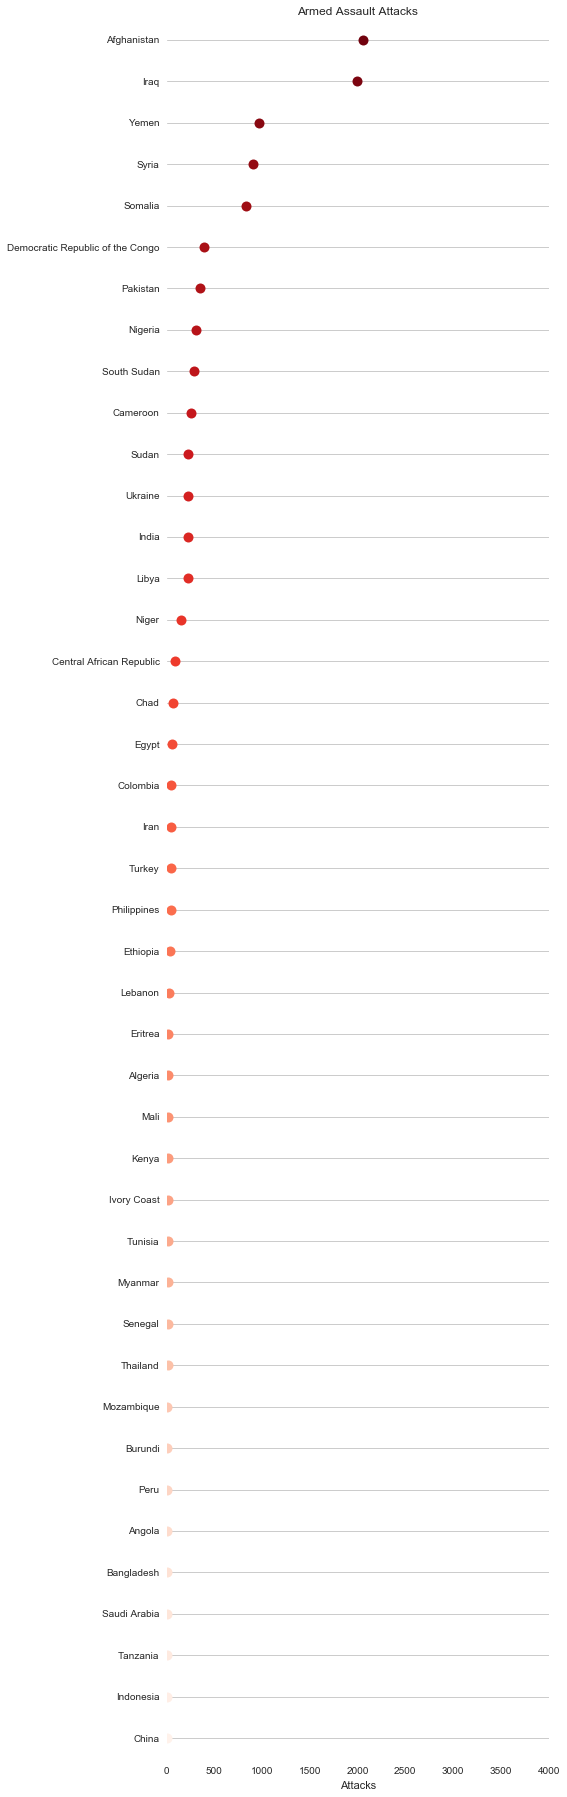

In [141]:
interact(plot, attacktype=('Armed Assault', 'Assassination', 'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Hijacking', 'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)', 'Unarmed Assault', 'Unknown'));